In [1]:
import pandas as pd


In [2]:
tov_df = pd.read_csv('tov_data_fixed.csv')
rating_df = pd.read_csv('team_ratings.csv')
ppp_df = pd.read_csv('shot_clock_ppp.csv')


In [3]:
ppp_df.head()

,Unnamed: 0,TEAM_ID,TEAM_NAME,Total_POSS,Total_PTS,PPP,SC_REMAINING,SCALED_PPP
0,0,1610612737,Atlanta Hawks,11197.0,7366.0,0.657855,24-22,1.128861
1,1,1610612738,Boston Celtics,10340.0,7150.0,0.691489,24-22,1.186577
2,2,1610612739,Cleveland Cavaliers,10982.0,7865.0,0.716172,24-22,1.228932
3,3,1610612740,New Orleans Pelicans,11061.0,7082.0,0.640268,24-22,1.098682
4,4,1610612741,Chicago Bulls,11010.0,7335.0,0.666213,24-22,1.143203


In [4]:
tov_df['shot_clock'] = tov_df['shot_clock'].apply(lambda x: min(24, x))

In [5]:
nba_team_abbreviations = {
    "Atlanta Hawks": "ATL",
    "Boston Celtics": "BOS",
    "Brooklyn Nets": "BKN",
    "Charlotte Hornets": "CHA",
    "Chicago Bulls": "CHI",
    "Cleveland Cavaliers": "CLE",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Detroit Pistons": "DET",
    "Golden State Warriors": "GSW",
    "Houston Rockets": "HOU",
    "Indiana Pacers": "IND",
    "LA Clippers": "LAC",
    "Los Angeles Lakers": "LAL",
    "Memphis Grizzlies": "MEM",
    "Miami Heat": "MIA",
    "Milwaukee Bucks": "MIL",
    "Minnesota Timberwolves": "MIN",
    "New Orleans Pelicans": "NOP",
    "New York Knicks": "NYK",
    "Oklahoma City Thunder": "OKC",
    "Orlando Magic": "ORL",
    "Philadelphia 76ers": "PHI",
    "Phoenix Suns": "PHX",
    "Portland Trail Blazers": "POR",
    "Sacramento Kings": "SAC",
    "San Antonio Spurs": "SAS",
    "Toronto Raptors": "TOR",
    "Utah Jazz": "UTA",
    "Washington Wizards": "WAS"
}


In [6]:
ppp_df['TEAM_NAME'] = ppp_df['TEAM_NAME'].apply(lambda x: nba_team_abbreviations.get(x, x))
ppp_df.head()

,Unnamed: 0,TEAM_ID,TEAM_NAME,Total_POSS,Total_PTS,PPP,SC_REMAINING,SCALED_PPP
0,0,1610612737,ATL,11197.0,7366.0,0.657855,24-22,1.128861
1,1,1610612738,BOS,10340.0,7150.0,0.691489,24-22,1.186577
2,2,1610612739,CLE,10982.0,7865.0,0.716172,24-22,1.228932
3,3,1610612740,NOP,11061.0,7082.0,0.640268,24-22,1.098682
4,4,1610612741,CHI,11010.0,7335.0,0.666213,24-22,1.143203


In [7]:
def lost_points(df, row):
    if row['shot_clock'] >= 22:
        val = df[(df['SC_REMAINING'] == '24-22') & (df['TEAM_NAME'] == row['team'])]['SCALED_PPP']
    elif row['shot_clock'] >= 18:
        val = df[(df['SC_REMAINING'] == '22-18') & (df['TEAM_NAME'] == row['team'])]['SCALED_PPP']
    elif row['shot_clock'] >= 15:
        val = df[(df['SC_REMAINING'] == '18-15') & (df['TEAM_NAME'] == row['team'])]['SCALED_PPP']
    elif row['shot_clock'] >= 7:
        val = df[(df['SC_REMAINING'] == '15-7') & (df['TEAM_NAME'] == row['team'])]['SCALED_PPP']
    elif row['shot_clock'] >= 4:
        val = df[(df['SC_REMAINING'] == '7-4') & (df['TEAM_NAME'] == row['team'])]['SCALED_PPP']
    else:
        val = df[(df['SC_REMAINING'] == '4-0') & (df['TEAM_NAME'] == row['team'])]['SCALED_PPP']
    
    # Return the scalar value if it exists, otherwise NaN
    return val.iloc[0] if not val.empty else float('nan')

tov_df['lost_points'] = tov_df.apply(lambda row: lost_points(ppp_df, row), axis=1)


In [8]:
from utils.utils import *
tov_df['expected_next_points'] = tov_df.apply(lambda row: get_relative_rating(rating_df, row['team'], row['opp_team'], 2024), axis=1)

tov_df.head()

,team,player_id,player,type,period,clock,gameId,actionNumber,next_pos_points,shot_clock,opp_team,dead_ball,lost_points,expected_next_points
0,ATL,1630552,Johnson,Traveling,1,677.0,22400001,14,0,19.0,BOS,1,1.251104,1.086910
1,BOS,1627759,Brown,Bad Pass,1,657.0,22400001,15,0,4.0,ATL,0,1.166037,1.146798
2,ATL,1630700,Daniels,Bad Pass,1,655.0,22400001,17,0,22.0,BOS,0,1.128861,1.086910
3,BOS,1628401,White,Bad Pass,1,654.0,22400001,19,3,23.0,ATL,0,1.186577,1.146798
4,BOS,201950,Holiday,Bad Pass,1,327.0,22400001,108,2,16.0,ATL,0,1.358227,1.146798


In [9]:
tov_df['dead_ball_adj'] = tov_df.apply(lambda row: get_relative_adj(rating_df, row['team'], row['opp_team'], 2024), axis=1)
tov_df.head()


,team,player_id,player,type,period,clock,gameId,actionNumber,next_pos_points,shot_clock,opp_team,dead_ball,lost_points,expected_next_points,dead_ball_adj
0,ATL,1630552,Johnson,Traveling,1,677.0,22400001,14,0,19.0,BOS,1,1.251104,1.086910,0.015
1,BOS,1627759,Brown,Bad Pass,1,657.0,22400001,15,0,4.0,ATL,0,1.166037,1.146798,0.025
2,ATL,1630700,Daniels,Bad Pass,1,655.0,22400001,17,0,22.0,BOS,0,1.128861,1.086910,0.015
3,BOS,1628401,White,Bad Pass,1,654.0,22400001,19,3,23.0,ATL,0,1.186577,1.146798,0.025
4,BOS,201950,Holiday,Bad Pass,1,327.0,22400001,108,2,16.0,ATL,0,1.358227,1.146798,0.025


In [10]:
def get_value(row):

    if row['dead_ball']:
        return row['next_pos_points'] - row['expected_next_points'] + row['lost_points']
    
    return row['lost_points'] - row['dead_ball_adj']


tov_df['value'] = tov_df.apply(lambda row: get_value(row), axis=1)

In [11]:
tov_df

,team,player_id,player,type,period,clock,gameId,actionNumber,next_pos_points,shot_clock,opp_team,dead_ball,lost_points,expected_next_points,dead_ball_adj,value
0,ATL,1630552,Johnson,Traveling,1,677.0,22400001,14,0,19.0,BOS,1,1.251104,1.086910,0.015,0.164194
1,BOS,1627759,Brown,Bad Pass,1,657.0,22400001,15,0,4.0,ATL,0,1.166037,1.146798,0.025,1.141037
2,ATL,1630700,Daniels,Bad Pass,1,655.0,22400001,17,0,22.0,BOS,0,1.128861,1.086910,0.015,1.113861
3,BOS,1628401,White,Bad Pass,1,654.0,22400001,19,3,23.0,ATL,0,1.186577,1.146798,0.025,1.161577
4,BOS,201950,Holiday,Bad Pass,1,327.0,22400001,108,2,16.0,ATL,0,1.358227,1.146798,0.025,1.333227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27551,HOU,1627832,VanVleet,Bad Pass,4,607.0,22401230,568,0,14.0,OKC,0,1.169075,1.074958,0.035,1.134075
27552,OKC,1628392,Hartenstein,Bad Pass,4,597.0,22401230,570,2,14.0,HOU,0,1.318763,1.108611,0.040,1.278763
27553,HOU,1641708,Thompson,Offensive Foul Turnover,4,441.0,22401230,604,2,20.0,OKC,1,1.197224,1.074958,0.035,2.122266
27554,HOU,1641708,Thompson,Lost Ball,4,376.0,22401230,626,2,6.5,OKC,0,1.028768,1.074958,0.035,0.993768


In [19]:
by_player = tov_df[['team', 'player_id', 'player', 'value', 'period']].groupby(by=['team', 'player_id', 'player']).agg({'value': 'mean', 'period': 'count'})

by_player[by_player['period']>25].sort_values('value', ascending=False).head(10)

,,,value,period
team,player_id,player,,
IND,1630167,Toppin,1.493192,49
MIL,1626171,Portis,1.446227,56
BOS,201143,Horford,1.427352,36
LAL,1629216,Vincent,1.422026,32
CHI,1630172,Williams,1.416285,60
MEM,1641713,Jackson,1.390620,26
CHI,1630188,Smith,1.368185,34
SAC,1631099,Murray,1.365657,51
PHI,1641741,Council IV,1.358364,29


In [24]:
by_player = tov_df[['team', 'player_id', 'player', 'value', 'period']].groupby(by=['team', 'player_id', 'player']).agg({'value': 'sum', 'period': 'count'})

by_player[by_player['period']>50].sort_values('value', ascending=False).head(10)

,,,value,period
team,player_id,player,,
ATL,1629027,Young,338.395848,287
LAC,201935,Harden,314.036776,276
DET,1630595,Cunningham,310.645898,274
LAL,2544,James,242.394368,226
MIN,1630162,Edwards,233.776389,207
DEN,203999,Jokić,231.294995,192
SAC,1627734,Sabonis,200.890422,167
UTA,1642268,Collier,198.200496,166
MIL,203507,Antetokounmpo,197.541466,168


In [22]:
len(by_player[by_player['period']>50])

196

In [30]:
qualifiers = by_player[by_player['period']>= 50]
qualifiers.reset_index(inplace=True)

/var/folders/d4/c154mt9s11x5q965j91l06qw0000gn/T/ipykernel_34985/2827869359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifiers['rel_diff'] = (qualifiers['period'] - qualifiers['value']) / (


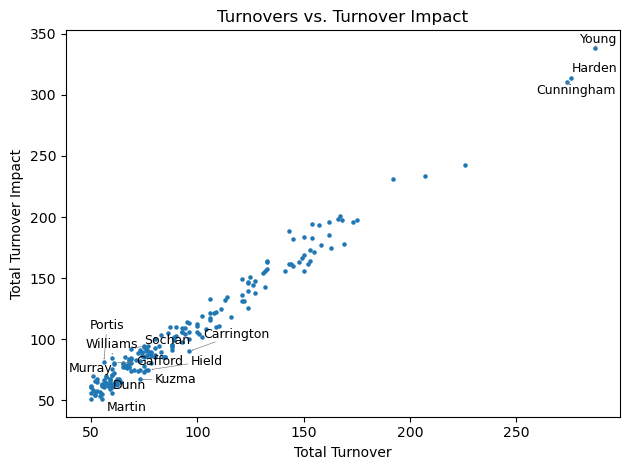

In [42]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Compute relative difference (signed)
qualifiers['rel_diff'] = (qualifiers['period'] - qualifiers['value']) / (
    (qualifiers['period'] + qualifiers['value']) / 2
).replace(0, 1)

# Top 3 largest positive and negative relative differences
top_pos_diff = qualifiers[qualifiers['rel_diff'] > 0].nlargest(5, 'rel_diff').index
top_neg_diff = qualifiers[qualifiers['rel_diff'] < 0].nsmallest(5, 'rel_diff').index

# Top 3 period and value
top_period = qualifiers.nlargest(3, 'period').index
top_value = qualifiers.nlargest(3, 'value').index

# Combine all outlier indices
outlier_indices = set(top_pos_diff) | set(top_neg_diff) | set(top_period) | set(top_value)

# Plot
fig, ax = plt.subplots()
ax.scatter(qualifiers['period'], qualifiers['value'], s =5)

# Prepare text objects
texts = []
for i in outlier_indices:
    row = qualifiers.loc[i]
    texts.append(
        ax.text(row['period'], row['value'], row['player'], fontsize=9)
    )

# Adjust text to reduce overlap
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

plt.xlabel('Total Turnover')
plt.ylabel('Total Turnover Impact')
plt.title('Turnovers vs. Turnover Impact')
plt.tight_layout()
plt.show()


In [ ]:
from nba_api.stats.endpoints import LeagueDashPlayerStats
import pandas as pd
import time

# Add a short delay to avoid being blocked
time.sleep(1)

# Get touches data for the 2024-25 regular season
touches = LeagueDashPlayerStats(
    season='2024-25',
    measure_type_detailed_defense = 'Tracking'
)

# Convert to DataFrame
df = touches.get_data_frames()[0]

df.head()

# # Sort by Time of Possession descending (to match the web page)
# df_sorted = df.sort_values(by='TIME_OF_POSS', ascending=False)

# # Display top 10 players by time of possession
# print(df_sorted[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'TIME_OF_POSS', 'TOUCHES', 'AVG_SEC', 'AVG_DRIB']].head(10))


ModuleNotFoundError: No module named 'nba_api.stats.endpoints.LeagueDashPlayerStats'

In [15]:
ppp_df['SC_REMAINING'].unique()

array(['24-22', '22-18', '18-15', '15-7', '7-4', '4-0'], dtype=object)

In [6]:
rating_df = rating_df[rating_df['year']==2024]
rating_df

,Unnamed: 0,team,year,non_fb_o_rating,non_fb_d_rating,o_half_court_dff,d_half_court_dff
832,0,CLE,2024,1.198000,1.082667,0.03,0.05
833,1,DEN,2024,1.170225,1.123596,0.04,0.02
834,2,BOS,2024,1.180000,1.080000,0.00,0.01
835,3,OKC,2024,1.150000,1.033736,0.03,0.04
836,4,NYK,2024,1.150000,1.127333,0.03,0.02
837,5,MEM,2024,1.145730,1.084382,0.04,0.04
838,6,SAC,2024,1.134000,1.129101,0.04,0.03
839,7,IND,2024,1.131461,1.131538,0.03,0.02
840,8,DAL,2024,1.120000,1.110000,0.04,0.02
841,9,PHX,2024,1.118000,1.143933,0.03,0.02


In [11]:
tov_df.head()

,team,player_id,player,type,period,clock,gameId,actionNumber,next_pos_points,shot_clock,opp_team,dead_ball
0,ATL,1630552,Johnson,Traveling,1,677.0,22400001,14,0,19.0,BOS,1
1,BOS,1627759,Brown,Bad Pass,1,657.0,22400001,15,0,4.0,ATL,0
2,ATL,1630700,Daniels,Bad Pass,1,655.0,22400001,17,0,22.0,BOS,0
3,BOS,1628401,White,Bad Pass,1,654.0,22400001,19,3,23.0,ATL,0
4,BOS,201950,Holiday,Bad Pass,1,327.0,22400001,108,2,16.0,ATL,0
